#**Prueba nro 1 Fundamentos de Machine Learning**

Realizado por Jean González

## Metodología Orientadas a Datos: CRISP-DM

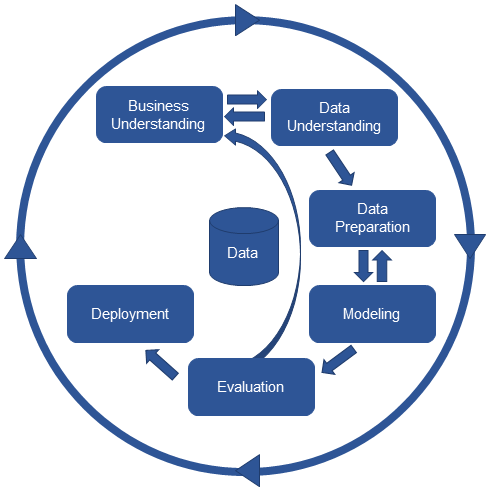

##Cargar los datos y funciones


In [ ]:
# importa las librerías a nuestro entorno de trabajo
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

#Librerias
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Modelos
from sklearn.impute import KNNImputer
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.datasets import make_regression

from sklearn import tree



%matplotlib inline

Mounted at /content/drive


In [ ]:
#Direccion Jose
url = 'https://drive.google.com/file/d/1nFE7-J_VXsYvCfHTcnWVIv-TCymcfKgw/view?usp=sharing'
#Direccion Jean
df = pd.read_csv(url, sep=';')

df

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,3.229091e+05,100831.407375,123.567901,0.000000,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,5.471375e+05,60960.883185,87.839889,0.000000,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000e+00,56422.523836,94.668664,0.000000,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,7.689232e+05,89634.733132,117.785457,0.000000,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,2.023974e+05,108656.497344,128.132662,0.000000,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,False,34.027207,0.425085,0.000000e+00,40481.778529,46.530780,0.000000,1.370955e+06,1,1,1.0,0.0,0.0,0.0,0,22.775960,0,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,False,29.261054,0.365544,0.000000e+00,32134.776126,42.960931,109345.366682,1.223142e+06,0,0,1.0,0.0,0.0,0.0,0,28.714119,1,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,False,59.147178,0.738897,2.279624e+06,60051.689383,39.690475,0.000000,9.462262e+05,1,1,1.0,0.0,0.0,0.0,0,29.768923,0,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,False,42.582843,0.531967,1.502696e+06,27987.628542,25.700302,0.000000,1.218743e+06,0,2,0.0,1.0,0.0,0.0,0,75.281780,0,0,0,0,4950,27100,1,0,1,0,984575.199373


#**Fase I Business Understading / Conocer el Negocio**

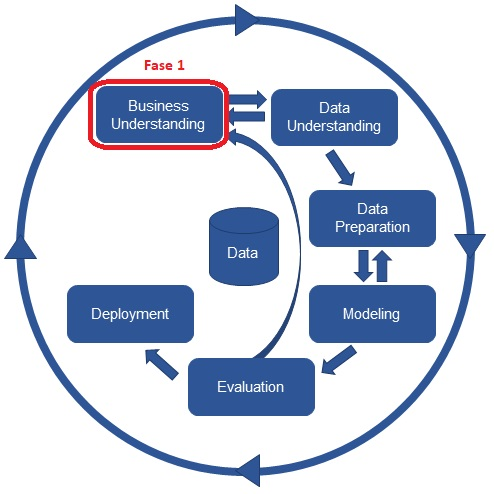


###Contexto del caso
El juego Counter Strike: GO tiene dos equipos de 5 jugadores, denominados Terroristas y Contra-Terroristas; estos equipos son rivales. El objetivo del equipo Terrorista es plantar una bomba con un temporizador de 45 segundos en uno de los dos sitios específicos del mapa.

Por el otro lado, el objetivo del equipo Contraterrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada.

Estos datos fueron extraídos desde la replays de 7000 partidas del juego (Cada partida contiene un máximo de 10 jugadores). Estas replays fueron extraídas de la red utilizando un scrapper.

###**Objetivo del equipo de análisis**
El objetivo de nuestro análisis es utilizar modelos de aprendizaje supervisado para predecir la cantidad de asesinatos que un jugador realizará durante una partida en el videojuego, para ello ocupamos parámetros como: 
* Mapa donde se realizará el juego
* Cantidad de asistencias que tiene el jugador durante la partida. 
* Cantidad de tiros a la cabeza que tiene el jugador durante la partida.
* Cantidad de asesinatos realizados sin ser visto por el enemigo.



###Descripción de variables

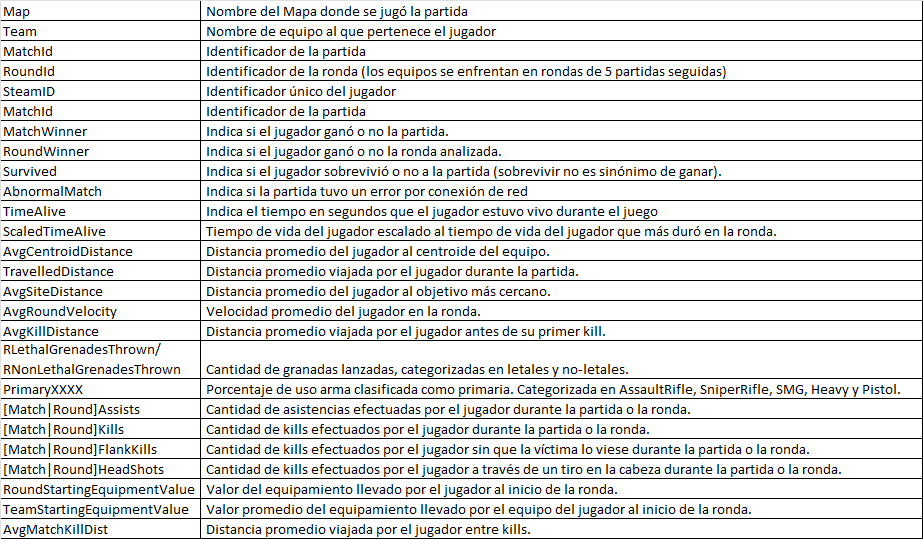

###Tipos de Variables


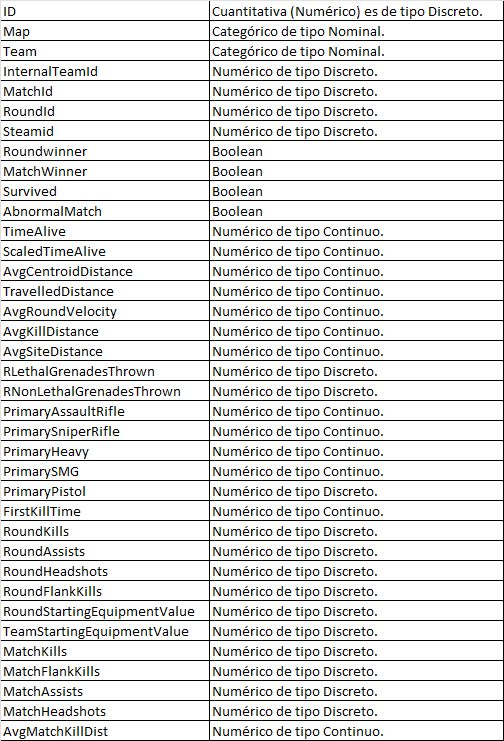

#**Fase II Data Understanding / Estudio y comprensión de los datos**      

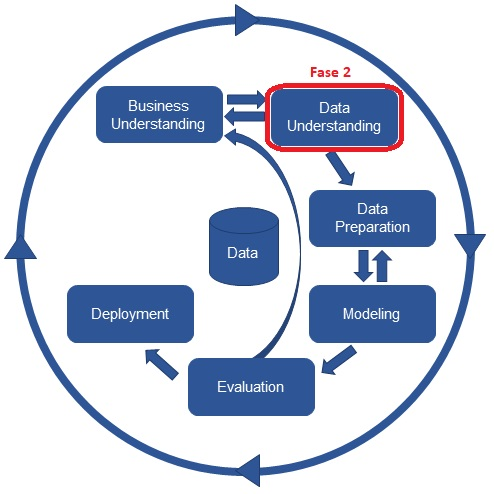

##Comprensión de los datos.
La base de datos cuenta con una muestra de 7000 partidas del juego (con un máximo de 10 jugadores en cada equipo). Estos datos son extraídos de replays, los cuales equivalen a cada acción realizada por cada jugador dentro de una partida.
##Se analiza la base de datos obteniendo
* Cantidad de columnas y filas
* El tipo de datos por columna
* Cantidad de valores NULL/NaN por columna



##Descripciones estadísticas de los datos numéricos
Este proceso sobre los datos entregados, es para poder conocer mejor y saber cómo manipularlos. La función describe() nos entrega un resumen de estadísticas descriptivas, al ocupar esta función en este punto nos dimos cuenta de varios datos extraños, y uno de ellos es que algunos están registrados con gran cantidad de decimales.




In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
count,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04,79157.000000,79157.000000,7.915700e+04,7.915700e+04,79157.000000,7.915700e+04,7.915700e+04,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04
mean,60570.193640,1.500006,250.525033,12.765517,7.656120e+16,72.795720,0.829561,1.122538e+06,1.041888e+05,84.351773,2.880379e+05,2.828657e+06,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,0.221787,58.066821,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484,6.288927e+05
std,36436.598386,0.500003,149.557804,7.432837,3.342137e+07,48.321035,0.210842,1.134700e+06,3.543487e+05,171.890139,6.036307e+05,1.528175e+06,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,0.415451,32.424435,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752,3.402574e+05
min,600.000000,1.000000,4.000000,1.000000,7.656120e+16,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,30830.000000,1.000000,128.000000,6.000000,7.656120e+16,47.080072,0.698892,2.578825e+05,5.898255e+04,56.202641,0.000000e+00,1.508095e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.273243,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000,4.097790e+05
50%,56720.000000,2.000000,236.000000,12.000000,7.656120e+16,69.239615,0.922777,7.409804e+05,8.601557e+04,83.617316,0.000000e+00,2.699214e+06,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,54.774193,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000,5.542432e+05
75%,90639.000000,2.000000,373.000000,19.000000,7.656120e+16,92.647813,1.000000,1.753172e+06,1.213966e+05,104.131144,3.603394e+05,3.728018e+06,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,79.065900,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000,7.524568e+05
max,123779.000000,2.000000,511.000000,36.000000,7.656120e+16,2990.560394,2.000000,2.202346e+07,3.964645e+07,24111.819781,1.104564e+07,1.203440e+07,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,545.034851,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000,5.170168e+06


In [ ]:
df.median()

Unnamed: 0                     5.672000e+04
InternalTeamId                 2.000000e+00
MatchId                        2.360000e+02
RoundId                        1.200000e+01
SteamId                        7.656120e+16
RoundWinner                    0.000000e+00
MatchWinner                    0.000000e+00
Survived                       0.000000e+00
AbnormalMatch                  0.000000e+00
TimeAlive                      6.923962e+01
ScaledTimeAlive                9.227766e-01
AvgCentroidDistance            7.409804e+05
TravelledDistance              8.601557e+04
AvgRoundVelocity               8.361732e+01
AvgKillDistance                0.000000e+00
AvgSiteDistance                2.699214e+06
RLethalGrenadesThrown          0.000000e+00
RNonLethalGrenadesThrown       1.000000e+00
PrimaryAssaultRifle            1.000000e+00
PrimarySniperRifle             0.000000e+00
PrimaryHeavy                   0.000000e+00
PrimarySMG                     0.000000e+00
PrimaryPistol                  0

###**Analizando los datos nos podemos dar cuenta que:**

- El máximo existente en la columna **"TimeAlive"** es 2990,66..., considerando que el promedio es 72, consideramos el valor máximo de la tabla como un outliers; una vez confirmado con un gráfico de dispersión.
 
- El máximo existente en la columna **"TravelledDistance"** sobre pasa los 3.700.000 de pasos; mientras que el promedio se encuentra en 1.041.888. Debido a la notable diferencia en estos datos, consideramos el valor máximo de la tabla como un outliers, una vez confirmado con un gráfico de dispersión.

- Sobre la desviación estándar podemos observar que existen varias columnas que presentan una mayor dispersión en sus datos, estas son: **TimeAlive, AvgRoundVelocity, AvgKillDistance, FirstKillTime, RoundStartingEquipmentValue, TeamStartingEquipmentValue, MatchKills, MatchHeadshots, AvgMatchKillDist**, estos nos indica que su concentración de datos es menor que en las otras características.

- Podemos observar que en las columnas **“MatchAssists” y "MatchFlankKills"** la media tiende a ser valores bajos esto nos indica que la mayoría de los jugadores tienden a tener pocas asistencias durante las partidas.


##Conociendo la data
Nuestra data contiene **79157** filas y **37** columnas que debemos investigar, hacer limpieza y realizar análisis dependiendo de lo requerido.



In [ ]:
df.shape  


(79157, 37)

En el estudio de los tipos de datos, podemos observar que tenemos una gran variedad de tipos entre ellos: **Int**, **Boolean**, **Float**, **Object**.


Debido a que los valores de tipo **float** cuentan con una gran cantidad de decimales existe una posibilidad en la cual estos valores sean recortados para un mejor análisis en el futuro.

Para los valores de tipo **Boolean**, existe igualmente una posibilidad de transformar estos datos a valores numéricos para un mejor tratado de datos y análisis.

In [ ]:
df.dtypes

Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
SteamId                          int64
RoundWinner                       bool
MatchWinner                       bool
Survived                          bool
AbnormalMatch                     bool
TimeAlive                      float64
ScaledTimeAlive                float64
AvgCentroidDistance            float64
TravelledDistance              float64
AvgRoundVelocity               float64
AvgKillDistance                float64
AvgSiteDistance                float64
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime            

##Buscando Mising values (Null/NA)

Se buscan y analizan valores nullos existentes dentro del dataframe para realizar un tratamiento posteriormente.

In [ ]:
df.isnull().sum().sum()

0

Como podemos apreciar en el resultado anterior podemos observar que el dataframe no contiene valores nullos.

##Analisis de Datos

Text(0.5, 1.0, 'Porcentajes de muerte segun mapa')

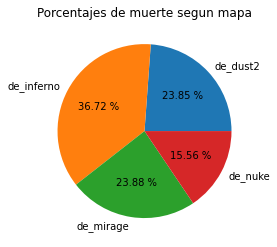

In [ ]:
df.groupby('Map')['MatchKills'].sum().plot(kind='pie',autopct="%.2f %%")
plt.ylabel('')
plt.title('Porcentajes de muerte segun mapa')

Según el grafico podemos definir que:

* El 23.85% de las muertes de las partidas se efectuaron en el mapa de_dust2
* El 23.88% se efectuaron en el mapa de_mirage,
* El 15.56% de las muertes se efectuaron en el mapa de_nuke
* El 36.72% de las muertes se efectuaron en el mapa de_inferno

Analizando los porcentajes de muertes por mapa podemos deducir que, 
•	En el mapa **”Nuke“** existe la menor cantidad de muertes con un **15,56%** de las muertes totales de nuestro DataFrame.
•	En el **”Inferno“** existe la mayor cantidad de muertes por partida con un **36,72%**, más del doble que el mapa **”Nuke”**.
Con el análisis anterior podemos observar que la cantidad de muertes existentes dentro nuestros datos no están correctamente distribuidos, esto podría ser un problema al utilizar un modelo de calificación como KNN debido a la mala distribución.






In [ ]:
Mapa = df.groupby('Map')['Team'].value_counts()
Mapa

Map         Team            
de_dust2    CounterTerrorist     9560
            Terrorist            9560
de_inferno  CounterTerrorist    14435
            Terrorist           14434
de_mirage   Terrorist            9511
            CounterTerrorist     9508
de_nuke     Terrorist            6087
            CounterTerrorist     6062
Name: Team, dtype: int64

Tambien podemos inferir del mapa infierno, es que puede ser que es mas fácil de jugar y recibe mas jugadores (entre terroristas y anti terroristas). Por eso el alto % de muertes que podemos ver en el gráfico de torta anterior.


Text(0.5, 1.0, 'total de disparos en la cabeza por mapa')

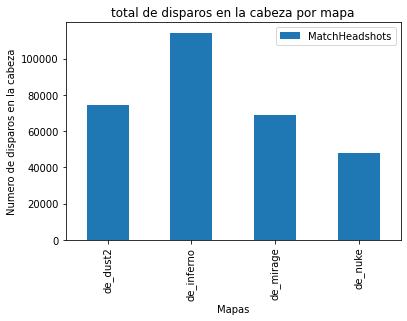

In [ ]:
df.groupby('Map')['MatchHeadshots'].sum().plot(kind='bar', legend='Reverse')
plt.xlabel('Mapas')
plt.ylabel('Numero de disparos en la cabeza')
plt.title('total de disparos en la cabeza por mapa')

Segun el gráfico podemos definir que:

* El mapa con mayor cantidad de disparos a la cabeza es el de_inferno.

* El mapa con menor cantidad de disparos a la cabeza es el de_nuke

El siguiente gráfico nos describe los tiros a la cabeza por mapa, continuando con el análisis anterior este mapa debe ser muy conocido por los jugadores llegando al punto de conocer los lugares mas usados por el equipo contrario; ya sea los lugares más utilizados para defender el site o las rutas más usadas para atacar el site.

##Buscando Outliers

Text(0, 0.5, 'Cantidad de asistencias realizados por el jugador')

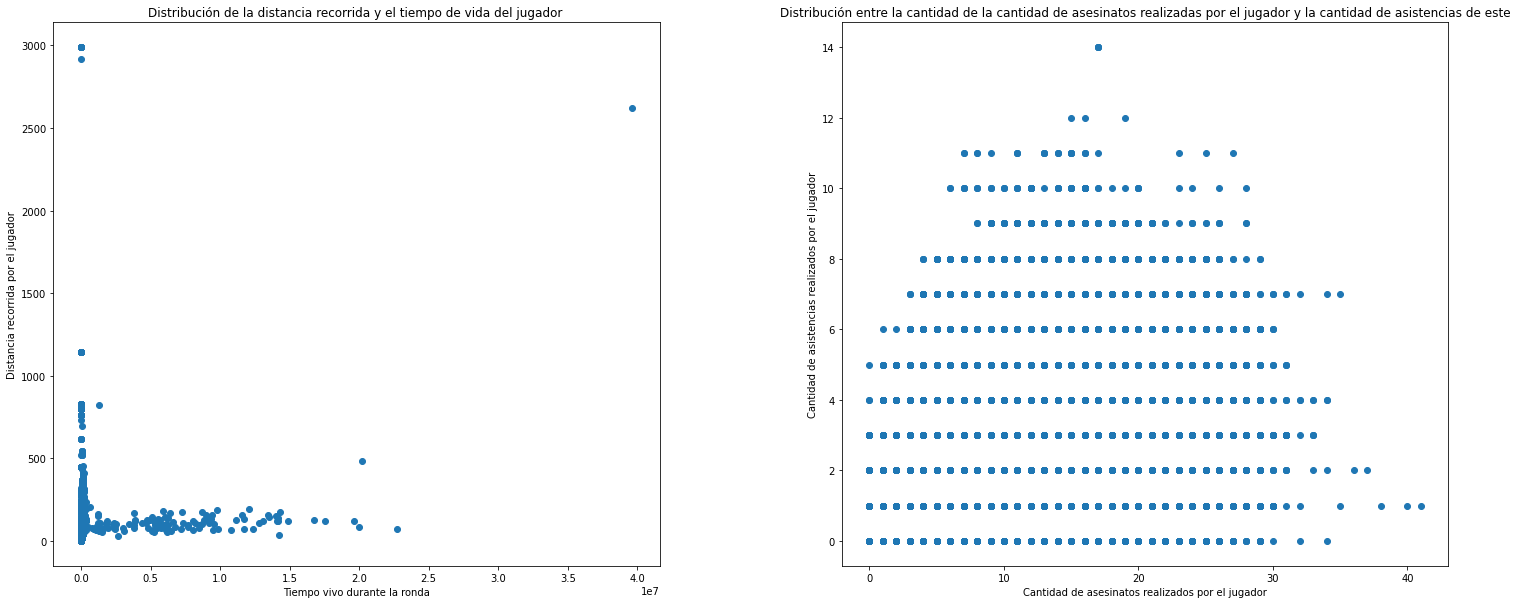

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
plt.subplots_adjust(wspace=.3)

#Gráfico 1
ax1.scatter(df['TravelledDistance'] , df['TimeAlive'])
ax1.set_title("Distribución de la distancia recorrida y el tiempo de vida del jugador ")
ax1.set_ylabel("Distancia recorrida por el jugador")
ax1.set_xlabel("Tiempo vivo durante la ronda")

#Gráfico 2
ax2.scatter(df['MatchKills'] , df['MatchAssists'])
ax2.set_title("Distribución entre la cantidad de la cantidad de asesinatos realizadas por el jugador y la cantidad de asistencias de este")
ax2.set_xlabel("Cantidad de asesinatos realizados por el jugador")
ax2.set_ylabel("Cantidad de asistencias realizados por el jugador")

###Anomalia 1°
Usuario con una distancia promedio viajada durante la partida demasiado alta, el usuario cuenta con una distancia considerablemente más alta que el promedio. Adicional a esto, cuenta con un tiempo de vida más alto que el promedio, debido a esto se considera como un outliers y será analizado en profundidad para realizar una acción al registro.


In [ ]:
df.iloc[[1033]]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
1033,2514,de_inferno,Terrorist,1,12,8,76561197974587647,True,False,True,False,2621.484484,0.876586,766422.564438,3.964645e+07,354.536997,0.0,9.439660e+06,0,0,1.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,1000,0,0,1,0,688285.247797


###Anomalia 2°
Ronda donde ambos equipos cuentan con un tiempo de vida demasiado prolongado sobrepasando los 2500 segundos, considerando que el promedio está en 72 segundos y los valores más altos en el promedio son de 1000 segundos; se considera a estos usuarios como outliers, que luego serán analizados para realizar una acción.


In [ ]:
df.iloc[[1029,1030,1031,1032,1033,1034,1036,1037,1038]]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
1029,2510,de_inferno,Terrorist,1,12,8,76561197960710573,True,False,True,False,2990.560394,1.000000,140096.187495,0.000000e+00,0.000000,0.0,1.017789e+07,0,0,0.0,0.0,0.0,0.0,1,302.077759,0,0,0,0,200,1000,1,0,0,0,837563.171965
1030,2511,de_inferno,Terrorist,1,12,8,76561198006920295,True,False,True,False,2990.560394,1.000000,116490.291935,0.000000e+00,0.000000,0.0,9.927341e+06,0,0,0.0,0.0,0.0,0.0,1,80.758800,0,0,0,0,300,1000,3,2,1,2,557122.106887
1031,2512,de_inferno,Terrorist,1,12,8,76561198000782895,True,False,True,False,2990.560394,1.000000,99245.465984,0.000000e+00,0.000000,0.0,9.202135e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,200,1000,0,0,0,0,611616.873013
1032,2513,de_inferno,Terrorist,1,12,8,76561197978241352,True,False,True,False,2990.560394,1.000000,96789.108171,0.000000e+00,0.000000,0.0,9.123051e+06,0,0,0.0,0.0,0.0,0.0,1,111.726105,0,0,0,0,300,1000,1,0,0,0,302441.367743
1033,2514,de_inferno,Terrorist,1,12,8,76561197974587647,True,False,True,False,2621.484484,0.876586,766422.564438,3.964645e+07,354.536997,0.0,9.439660e+06,0,0,1.0,0.0,0.0,0.0,0,0.000000,0,0,0,0,0,1000,0,0,1,0,688285.247797
1034,2515,de_inferno,CounterTerrorist,2,12,8,76561197963914156,False,True,True,False,2990.560394,1.000000,260549.459323,0.000000e+00,0.000000,0.0,3.229495e+06,0,0,1.0,0.0,0.0,0.0,0,108.444176,0,0,0,0,6100,17700,6,0,0,3,373116.899256
1036,2517,de_inferno,CounterTerrorist,2,12,8,76561198013603966,False,True,True,False,2990.560394,1.000000,266586.623627,0.000000e+00,0.000000,0.0,2.979252e+06,0,0,1.0,0.0,0.0,0.0,0,115.992607,0,0,0,0,6100,17700,2,2,0,1,453346.189559
1037,2518,de_inferno,CounterTerrorist,2,12,8,76561197972331023,False,True,True,False,2914.372849,0.974524,293346.034379,9.745704e+03,0.078392,0.0,3.511482e+06,0,0,1.0,0.0,0.0,0.0,0,86.033320,0,0,0,0,0,17700,4,0,3,2,871903.321032
1038,2519,de_inferno,CounterTerrorist,2,12,8,76561197983695262,False,True,True,False,2990.560394,1.000000,267593.986325,0.000000e+00,0.000000,0.0,3.280788e+06,0,0,1.0,0.0,0.0,0.0,0,100.380020,0,0,0,0,5500,17700,4,2,2,3,478394.605803


### Anomalia 3°
En el grafico anterior podemos observar que existe un valor atípico en la columna **“MatchKills”** con valores sobre las 40 kills en la partida, éste valor puede afectar de manera negativa al entrenamiento de los datos, debido a este mísmo caso es que se realizará un análisis a fondo del registro para decidir su debido tratamiento.


In [ ]:
df.iloc[[32700,32690]]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
32700,46002,de_inferno,CounterTerrorist,1,192,28,76561197961610974,True,True,True,False,74.688633,1.0,1.781587e+06,112484.970330,94.208518,183552.807546,2.393166e+06,1,2,0.005093,0.994907,0.0,0.0,0,45.438190,1,0,0,0,7250,28550,41,6,1,17,446791.530065
32690,45992,de_inferno,CounterTerrorist,1,192,27,76561197961610974,True,True,True,False,102.064048,1.0,5.131912e+05,149548.684961,91.635224,542868.391332,2.437168e+06,1,2,0.000000,1.000000,0.0,0.0,0,56.813362,2,0,0,0,7250,29950,40,6,1,17,446791.530065


### Anomalia 4°
Podemos observar en el grafico anterior que existe un valor atípico en la columna **”MatchAssists“** el cual claramente esta sobre el promedio, llegando a un valor de 14 asistencia en la partida. Se realizará un análisis a fondo en este registro.


In [ ]:
df.iloc[[72891,72901,72911,72921]]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
72891,115674,de_nuke,CounterTerrorist,1,477,26,76561198050950952,False,False,True,False,87.323398,1.000000,3.846392e+06,116595.189177,83.520909,347862.419628,3.306489e+06,1,3,1.0,0.0,0.0,0.0,0,63.94548,2,2,1,0,5500,31550,17,3,14,6,300324.23904
72901,115684,de_nuke,CounterTerrorist,1,477,27,76561198050950952,True,False,False,False,106.825832,0.803479,1.765741e+06,139488.411709,81.667688,0.000000,3.220334e+06,2,2,1.0,0.0,0.0,0.0,0,63.94548,0,0,0,0,6200,31850,17,3,14,6,300324.23904
72911,115694,de_nuke,CounterTerrorist,1,477,28,76561198050950952,False,False,True,False,81.260141,1.000000,2.774198e+06,96187.909483,74.047659,0.000000,3.185348e+06,1,3,1.0,0.0,0.0,0.0,0,63.94548,0,0,0,0,5500,29750,17,3,14,6,300324.23904
72921,115704,de_nuke,CounterTerrorist,1,477,29,76561198050950952,False,False,True,False,39.942485,1.000000,0.000000e+00,61505.579240,96.403729,0.000000,3.184515e+06,1,0,1.0,0.0,0.0,0.0,0,63.94548,0,0,0,0,6200,31650,17,3,14,6,300324.23904


#**Fase III  Data Preparation  /  Análisis de datos y Selección de características**

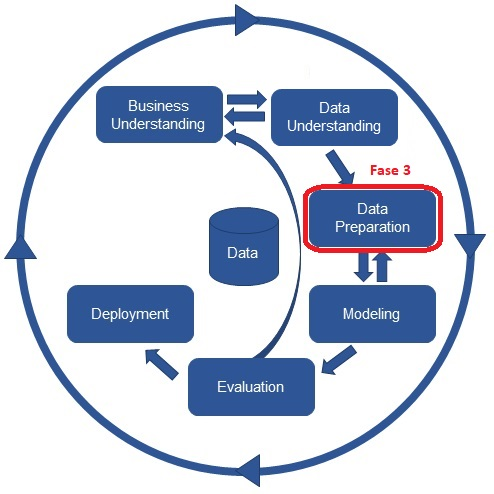

##Tratamiento de Outliers
 
Para dar comienzo a la fase 3 se realizará el tratamiento de los valores considerados "outliers".
A continuación se nombrarán las anomalías encontradas y el tipo de tratamiento a realizar dependiendo de la calidad del dato.


###Anomalia 1°
Se analizó el siguiente registro y podemos deducir por sus valores que se trata de un jugador que únicamente caminó durante toda la ronda, sin realizar otra acción como: comprar al inicio de la ronda, realizar un asesinato, realizar un disparo a la cabeza, etc.

Debído a no aportar registros de gran valor se genera un valor atípico; es por esto que se decide eliminar al usuario.




In [ ]:
df2 = df.drop([1033], axis=0)

###Anomalia 2°
Se realizó un análisis en las siguientes anomalías y debido a la gran diferencia en los valores, se determinó que probablemente se trate de una ronda especifica, donde ambos equipos no realizaron acción alguna, por lo tanto, es un registro real de una ronda jugada, sin embargo, debido a la gran diferencia de valores que tienen estos registros, a los otros y que no fue por problemas de conexión se decidió eliminar estos registros.


In [ ]:
df2 = df.drop([1029,1030,1031,1032,1033,1034,1036,1037,1038])

### Anomalia 3°
Se realizo un análisis a fondo del registro y determinamos que se trata de un jugador que debido a sus grandes habilidades con rifles de asalto y rifles francotirador obtuvo una gran cantidad de asesinatos durante la partida, junto a ésto, el registro completo cuenta con otros valores que respaldan esto como: **la cantidad de dinero utilizado en la ronda**, **El tipo de arma utilizada por el jugador durante la ronda** y **una clara actividad en las rondas de cada registro**.

**Debido a esto se decidió no alterar el registro ni eliminar** 

In [ ]:
df2.iloc[[32700,32690]]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
32709,46261,de_mirage,Terrorist,1,194,1,76561198006920295,True,True,False,False,58.693847,0.896848,2.391996e+06,72742.261605,77.550386,217694.436889,2.340419e+06,0,0,1.0,0.0,0.0,0.0,0,45.879963,2,1,0,0,400,12150,2,0,1,0,661763.881273
32699,46001,de_inferno,CounterTerrorist,1,192,28,76561197971492093,True,True,False,False,53.188307,0.712134,1.115953e+06,62667.027461,73.725915,285120.153238,2.359487e+06,0,1,0.0,1.0,0.0,0.0,0,41.938137,1,0,0,0,7150,28550,13,3,5,5,538413.597499


### Anomalia 4°
Al igual que el registro anterior, éste caso se trataría de un jugador que a lo largo de las rondas no logró asesinar a los enemigos que se encontraba, sin embargo, éste si les realizó daño a estos enemigos, que posteriormente fueron asesinados por otro jugador, logrando así obtener la asistencia por esa baja.

**Debido a esto se decidió no alterar el registro o eliminar el mísmo.**

In [ ]:
df2.iloc[[72891,72901,72911,72921]]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
72900,115683,de_nuke,CounterTerrorist,1,477,27,76561198004854956,True,False,False,False,45.318156,0.340856,3.234722e+06,87467.764432,120.811829,717910.004931,2.947899e+06,2,2,1.0,0.0,0.0,0.0,0,29.441174,1,0,1,0,5800,31850,26,4,2,18,398340.869231
72910,115693,de_nuke,CounterTerrorist,1,477,28,76561198004854956,False,False,False,False,61.007614,0.750769,2.442367e+06,95809.572394,98.266228,0.000000,2.929261e+06,0,1,1.0,0.0,0.0,0.0,0,29.441174,0,1,0,0,5500,29750,26,4,3,18,398340.869231
72920,115703,de_nuke,CounterTerrorist,1,477,29,76561198004854956,False,False,True,False,39.942485,1.000000,0.000000e+00,72541.653726,113.701652,100127.217688,2.928089e+06,1,2,1.0,0.0,0.0,0.0,0,39.942486,1,0,1,0,5600,31650,27,4,3,19,398340.869231
72930,115923,de_mirage,Terrorist,1,479,1,76561197973845818,True,True,True,False,82.752317,1.000000,8.427716e+05,187169.010511,141.473175,691045.317889,4.170377e+06,0,1,0.0,0.0,0.0,0.0,1,61.626724,3,0,1,0,900,3300,3,0,0,1,741522.927124


###Resultado

Gracias al tratado de los anteriores Outliers se consiguió una dispersión menor en los datos

Text(0, 0.5, 'Cantidad de asistencias realizados por el jugador')

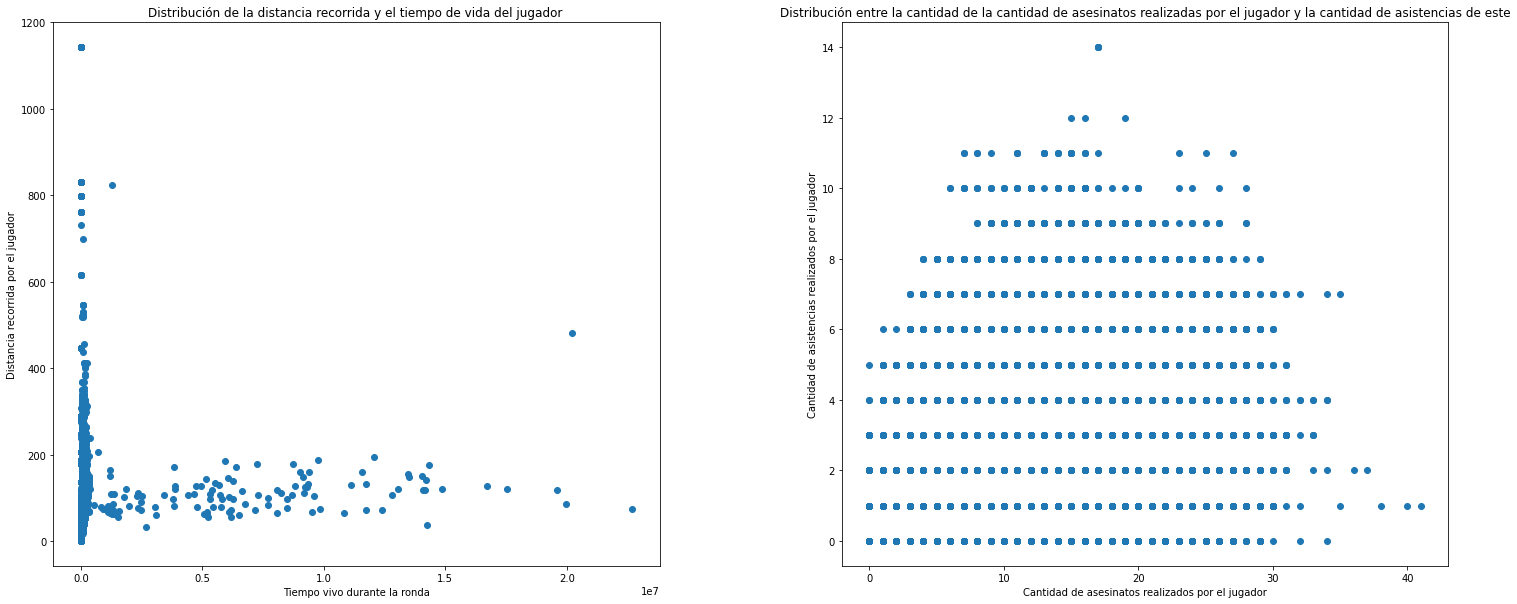

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
plt.subplots_adjust(wspace=.3)

#Gráfico 1
ax1.scatter(df2['TravelledDistance'] , df2['TimeAlive'])
ax1.set_title("Distribución de la distancia recorrida y el tiempo de vida del jugador ")
ax1.set_ylabel("Distancia recorrida por el jugador")
ax1.set_xlabel("Tiempo vivo durante la ronda")

#Gráfico 2
ax2.scatter(df2['MatchKills'] , df2['MatchAssists'])
ax2.set_title("Distribución entre la cantidad de la cantidad de asesinatos realizadas por el jugador y la cantidad de asistencias de este")
ax2.set_xlabel("Cantidad de asesinatos realizados por el jugador")
ax2.set_ylabel("Cantidad de asistencias realizados por el jugador")


### Cantidad de datos eliminados

In [ ]:
df.shape

(79157, 37)

In [ ]:
df2.shape

(79148, 37)

Podemos observar que luego de la eliminación de valores atípicos (outliers), la cantidad de registros (filas) del dataframe se redujo de 79.157 a 79.148 eliminando un total de 9 registros lo que equivale a un 0,01 de la data total

##Modificacion del DataFrame

Analizando las columnas que tiene el dataframe, observamos que existen 2 columnas con un mismo objetivo**"Team"** y **"InternalTeamId"**, ambos tienen como registro el equipo del jugador en cada juego, la diferencia de estos es que uno está en tipo de dato **"Object"** en el caso de **"Team"** y **"Int"** en el caso de **"InternalTeamId"**, para mejorar y facilitar el trabajo de los datos se eliminará la tabla **"Team"** debido al tipo de dato que éste contiene (**"Object"**).

In [ ]:
df2 = df2.drop(['Team'], axis=1)
df2

,Unnamed: 0,Map,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,3.229091e+05,100831.407375,123.567901,0.000000,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,5.471375e+05,60960.883185,87.839889,0.000000,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000e+00,56422.523836,94.668664,0.000000,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,7.689232e+05,89634.733132,117.785457,0.000000,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,2.023974e+05,108656.497344,128.132662,0.000000,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,2,511,5,76561198024905796,False,False,False,False,34.027207,0.425085,0.000000e+00,40481.778529,46.530780,0.000000,1.370955e+06,1,1,1.0,0.0,0.0,0.0,0,22.775960,0,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,2,511,5,76561198000020858,False,False,False,False,29.261054,0.365544,0.000000e+00,32134.776126,42.960931,109345.366682,1.223142e+06,0,0,1.0,0.0,0.0,0.0,0,28.714119,1,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,2,511,5,76561198013485667,False,False,False,False,59.147178,0.738897,2.279624e+06,60051.689383,39.690475,0.000000,9.462262e+05,1,1,1.0,0.0,0.0,0.0,0,29.768923,0,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,2,511,5,76561197972003061,False,False,False,False,42.582843,0.531967,1.502696e+06,27987.628542,25.700302,0.000000,1.218743e+06,0,2,0.0,1.0,0.0,0.0,0,75.281780,0,0,0,0,4950,27100,1,0,1,0,984575.199373


Se modifican las columnas **'RoundWinner', 'MatchWinner', 'Survived'** cambiandolas como boolean **'True' or 'False'** a valores numericos como **'1' or '0'** con el fin de modelar junto a estos valores.

In [ ]:
df2[['RoundWinner', 'MatchWinner', 'Survived']] = df2[['RoundWinner', 'MatchWinner', 'Survived']]*1

df2

,Unnamed: 0,Map,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,1,4,1,76561198036987787,0,1,0,False,51.120249,0.962309,3.229091e+05,100831.407375,123.567901,0.000000,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,1,4,1,76561197971812216,0,1,0,False,43.486626,0.818610,5.471375e+05,60960.883185,87.839889,0.000000,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,1,4,1,76561197972240652,0,1,0,False,37.354698,0.703180,0.000000e+00,56422.523836,94.668664,0.000000,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,1,4,1,76561197975824962,0,1,0,False,47.678861,0.897527,7.689232e+05,89634.733132,117.785457,0.000000,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,1,4,1,76561197960331095,0,1,1,False,53.122511,1.000000,2.023974e+05,108656.497344,128.132662,0.000000,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.000000,0,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,2,511,5,76561198024905796,0,0,0,False,34.027207,0.425085,0.000000e+00,40481.778529,46.530780,0.000000,1.370955e+06,1,1,1.0,0.0,0.0,0.0,0,22.775960,0,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,2,511,5,76561198000020858,0,0,0,False,29.261054,0.365544,0.000000e+00,32134.776126,42.960931,109345.366682,1.223142e+06,0,0,1.0,0.0,0.0,0.0,0,28.714119,1,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,2,511,5,76561198013485667,0,0,0,False,59.147178,0.738897,2.279624e+06,60051.689383,39.690475,0.000000,9.462262e+05,1,1,1.0,0.0,0.0,0.0,0,29.768923,0,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,2,511,5,76561197972003061,0,0,0,False,42.582843,0.531967,1.502696e+06,27987.628542,25.700302,0.000000,1.218743e+06,0,2,0.0,1.0,0.0,0.0,0,75.281780,0,0,0,0,4950,27100,1,0,1,0,984575.199373


##Label Encoder

Utilizaremos la función **”LabelEncoder”** para transformar la columna **”Map”** de tipo categoriza a tipo numérica nominal esto con el objetivo de mejorar el modelo y su nivel de predicción.

Se realizó esta transformación considerando los análisis realizados con 
anterioridad, donde se detalla que mapa es el que tiene un promedio de muertes mas alto.

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(df2['Map'])

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
df2['Map'] =le.fit_transform(df2['Map'])
df2[['Map']]

,Map
0,1
1,1
2,1
3,1
4,1
...,...
79152,2
79153,2
79154,2
79155,2


##Matriz de Correlación
La matriz de correlación nos permite analizar una lista multivariable de manera horizontal y vertical del coeficiente de correlación (R2) entre parejas de datos de cada celda X e Y, el resultado de este coeficiente va desde 0 a 1.

###Mapa de calor (Regresión)

Utilizaremos el grafico “Mapa de Calor” para buscar correlación entre las variables que tenemos.

* Las columnas en las que nos centraremos son "MatchFlanKills","MatchAsissts" y "MatchHeadshots". 

* Analizamos la correlación que tienen estas columnas con la columna "MatchKills".

Puntos para considerar:
* No debemos tomar en cuenta las siguientes columnas debido a que no agregan gran valor para el analisis: "Unnamed:0", "RoundId".



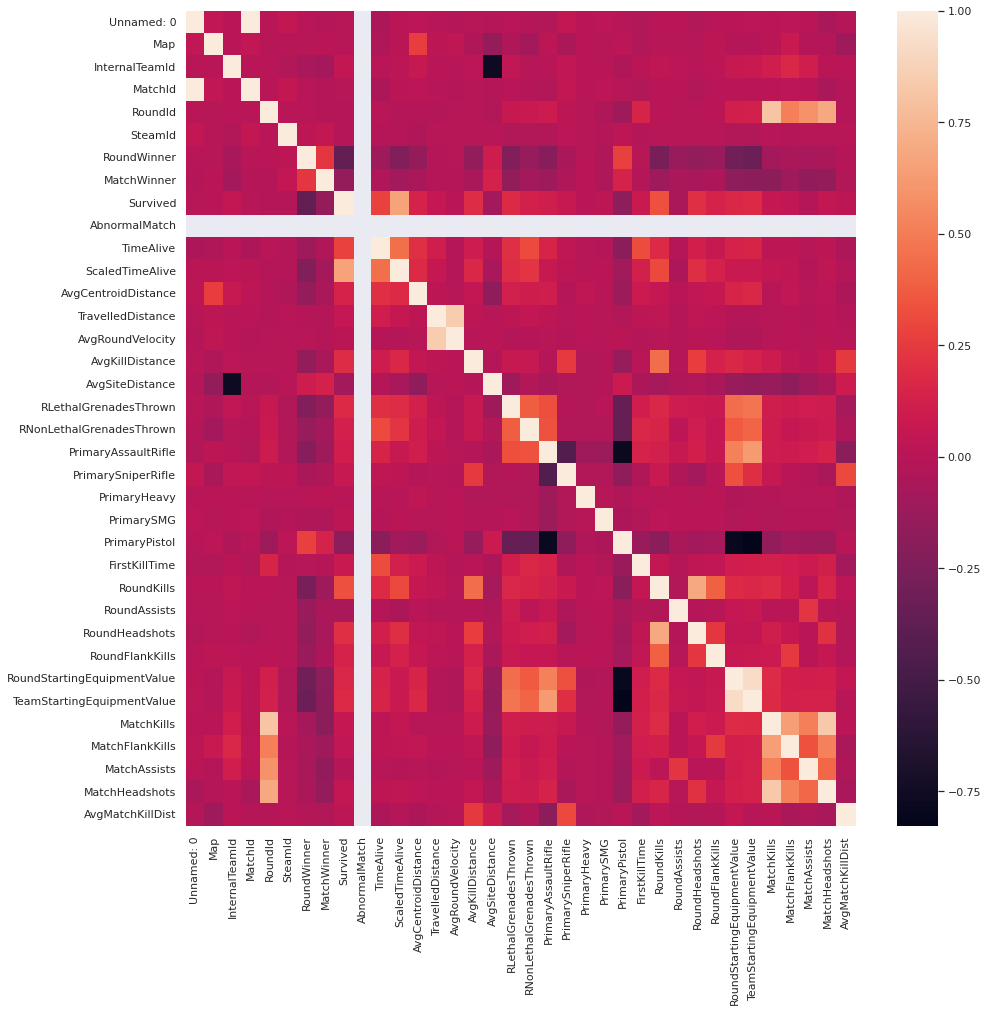

In [ ]:
import seaborn as sns; sns.set_theme()
df2.corr()

fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(data=df2.corr())

Podemos observar que existe buena correlación entre la variable **“MatchKills”** y las variables **”MatchFlanckKills“**, **”MatchAssists“**, **”MatchHeadshots“** este ultimo teniendo una mayor correlación con el valor**“MatchKills”**

###Funcion matriz de correlacion

Con la siguiente función podemos buscar una correlación más específica, ingresando una variable principal o llamada target y buscar las variables que tengan la mayor correlación con la variable principal (target).

In [ ]:
var_normal = df2[["Survived","InternalTeamId","MatchId","RoundId","SteamId","TimeAlive","ScaledTimeAlive","AvgCentroidDistance","TravelledDistance","AvgRoundVelocity","AvgKillDistance","AvgSiteDistance","RLethalGrenadesThrown",
            "RNonLethalGrenadesThrown","PrimaryAssaultRifle","PrimarySniperRifle","PrimaryHeavy","PrimarySMG","PrimaryPistol","FirstKillTime","RoundKills","RoundAssists","RoundHeadshots","RoundFlankKills","RoundStartingEquipmentValue",
            "TeamStartingEquipmentValue","MatchKills","MatchFlankKills","MatchAssists","MatchHeadshots","AvgMatchKillDist"]]

def correlacion_normal(columna1,columna2,vardata):
  a = vardata[columna1].corr(vardata[columna2]) 
  if a > 0.2:
    print(columna1)
    print(a)
  

# def correlacion_meses(columna1,columna2,vardata):
#   for x in Tnum:
#     col = (columna1 + str(x))
#     a = vardata[col].corr(vardata[columna2])
#     if a > 0.2:
#       print(col)
#       print(a)
  
# for x in var_meses:
#   correlacion_meses(x,'target',df)

#Valor para buscar correlación
for x in var_normal:
  correlacion_normal(x,'MatchKills',df)

RoundId
0.8075012941477074
MatchKills
1.0
MatchFlankKills
0.6415994728928989
MatchAssists
0.5100157569101762
MatchHeadshots
0.8314502696179308


#**Fase IV Modeling / Modelado**

En esta fase seleccionaremos y aplicaremos técnicas de modelado, aplicando distintos parámetros para una mejor respuesta final de entrenamiento. En la mayoría de los proyectos en este punto se acaba volviendo a la fase de preparación de datos para obtener mejores resultados.

El objetivo que buscamos con el modelo es predecir la cantidad de asesinatos que un jugador va a obtener, para ello ocupamos parámetros como: Cantidad de asistencias, Cantidad de tiros a la cabeza que tiene el jugador, Cantidad de asesinatos realizados sin ser visto por el enemigo, etc.


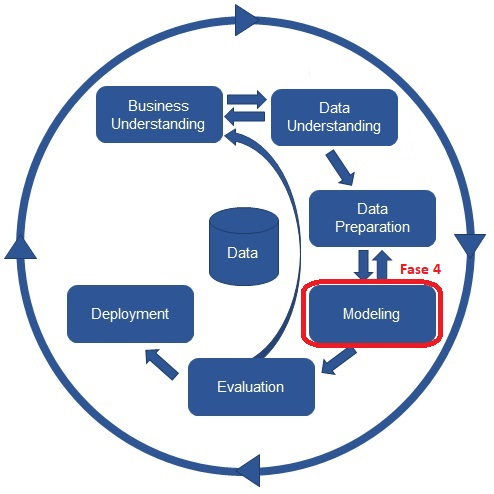

###**Árbol de Regresion**

El primer modelo para utilizar es el árbol de regresión donde intentaremos predecir cuantos asesinatos tendrá el jugador.
Junto al árbol utilizaremos la función GRID con el objetivo de buscar los hiperparámetros que se adapten mejor al modelo que estamos creando.


Mostraremos como está compuesto el dataframe antes de entrenar el modelo con este mismo.

In [ ]:
df2.head()

,Unnamed: 0,Map,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,1,1,4,1,76561198036987787,0,1,0,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,1,1,4,1,76561197971812216,0,1,0,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,1,1,4,1,76561197972240652,0,1,0,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,1,1,4,1,76561197975824962,0,1,0,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,1,1,4,1,76561197960331095,0,1,1,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176


In [ ]:
Y = df2['MatchKills']
X = df2[['Map','MatchHeadshots','MatchFlankKills','MatchAssists']]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=20,  random_state=20)
model = DecisionTreeRegressor() 

params = {"max_depth": np.arange(1,7),          
          "min_samples_split": np.arange(2,10)}  
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

Observamos la mejor puntuación obtenida y los Hiperparámetros del modelo.

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.773538679537443
{'max_depth': 6, 'min_samples_split': 2}


Mostramos la cantidad de modelos creados y los Hiperparámetros utilizados en cada uno.

In [ ]:
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015698,0.002174,0.002792,0.000250,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.504209,0.504338,0.496619,0.501498,0.497845,0.492328,0.491724,0.494975,0.488882,0.490733,0.496315,0.005302,41
1,0.015231,0.001870,0.002749,0.000225,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.504209,0.504338,0.496619,0.501498,0.497845,0.492328,0.491724,0.494975,0.488882,0.490733,0.496315,0.005302,41
2,0.014866,0.001442,0.002749,0.000395,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.504209,0.504338,0.496619,0.501498,0.497845,0.492328,0.491724,0.494975,0.488882,0.490733,0.496315,0.005302,41
3,0.014433,0.000948,0.002652,0.000249,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.504209,0.504338,0.496619,0.501498,0.497845,0.492328,0.491724,0.494975,0.488882,0.490733,0.496315,0.005302,41
4,0.015226,0.001809,0.002772,0.000460,1,6,"{'max_depth': 1, 'min_samples_split': 6}",0.504209,0.504338,0.496619,0.501498,0.497845,0.492328,0.491724,0.494975,0.488882,0.490733,0.496315,0.005302,41


Generamos una vista del modelo con el mejor, “el árbol ganador”.

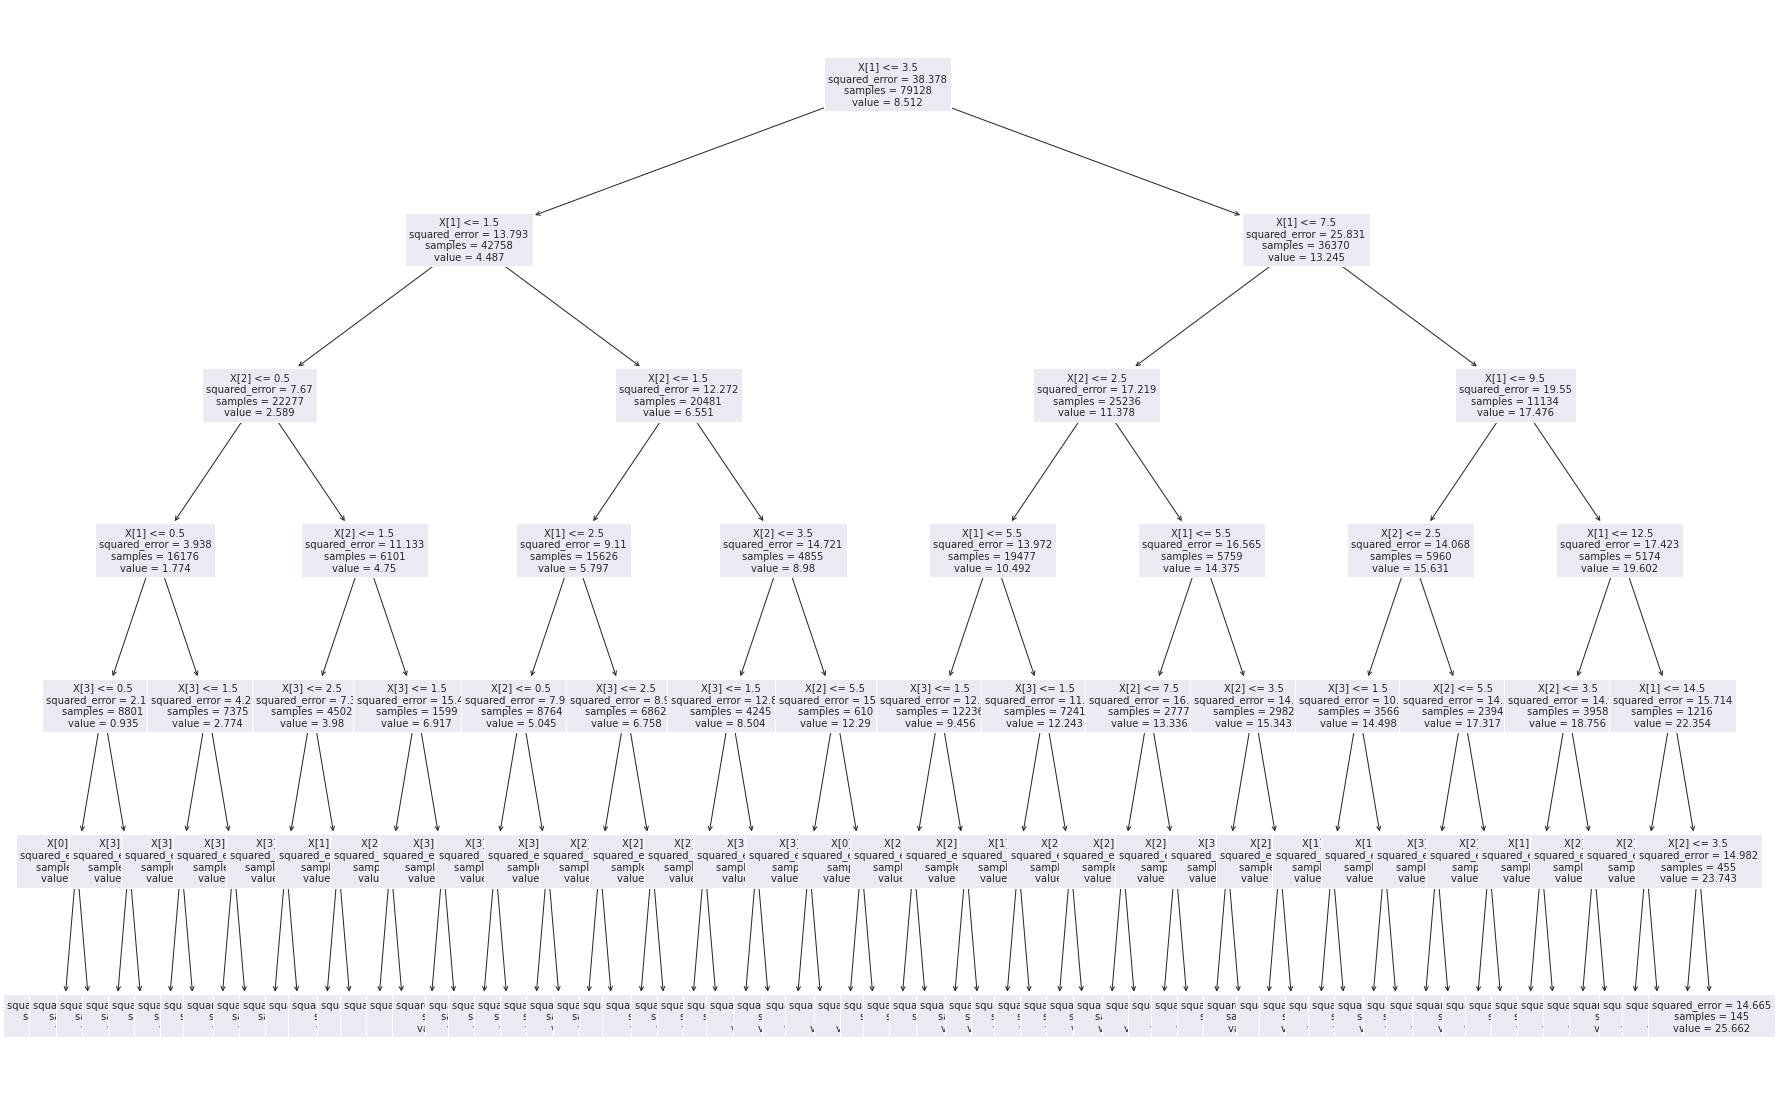

In [ ]:
# Visualizamos el árbol ganador!
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]
plt.subplots(1,1,figsize=(30,20))
_= tree.plot_tree(grid.best_estimator_, fontsize=10) 

####Métricas de Evaluación
Calculamos con métricas de evaluación el porcentaje de asertividad del modelo para predecir futuros resultados.

In [ ]:
Yhat = grid.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)



MSE:  5.177365935400007
MAE:  1.8236214864697022
R^2:  0.8654880245414391


### **KNN Regressor**

Mostraremos como esta compuesto el dataframe antes de entrenar el modelo con este mismo.

In [ ]:
df2.head()

,Unnamed: 0,Map,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,1,1,4,1,76561198036987787,0,1,0,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,1,1,4,1,76561197971812216,0,1,0,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,1,1,4,1,76561197972240652,0,1,0,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,1,1,4,1,76561197975824962,0,1,0,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,1,1,4,1,76561197960331095,0,1,1,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176


A Continuación utilizaremos el modelo **”KNN Regressor“** esperando conseguir una mejor predicción con los datos, este modelo aprende realizando una agrupación de datos con similares características.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Y = df2['MatchKills']
X = df2[['MatchHeadshots','MatchFlankKills','MatchAssists']]

KNN_Xtrain, KNN_Xtest, KNN_Ytrain, KNN_Ytest = train_test_split(X,Y,test_size=0.2, random_state=3)

Realizamos el entrenamiento del modelo con los datos escalados.

In [ ]:
KNN_reg = KNeighborsRegressor(n_neighbors=10, weights="distance")
regressor = KNN_reg.fit(KNN_Xtrain, KNN_Ytrain)
KNN_Y_pred = regressor.predict(KNN_Xtest)

Validamos la capacidad predictiva del modelo llamando métricas de evaluación para modelos de regresión.

In [ ]:
mse = metrics.mean_squared_error(KNN_Ytest, KNN_Y_pred)
mae = metrics.mean_absolute_error(KNN_Ytest, KNN_Y_pred)
R2 = r2_score(KNN_Ytest, KNN_Y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  8.747962958084509
MAE:  2.24204861010747
R^2:  0.7713979893456009


#**Fase V Evaluation / Evaluación**

En esta fase evaluaremos los distintos modelos utilizados y comparar ambos para elegir el más apto y continuar con el paso a producción.

Esta comparación se realizará en base a las métricas de evaluación de ambos modelos y las ventajas y desventajas de cada uno.

##**KNN Regressor**

### **Ventajas y Desventajas del modelo**

####**Ventajas**
* Muy fácil de interpretar y entender.
* Entrenar el modelo es tán rápido debido a que no necesita estimar los parámetros.
* No realiza ninguna suposición sobre los datos, lo cual lo convierte en un modelo flexible.

####**Desventajas**
* Son muy propensos a sobre ajustarse si no recibe los parámetros adecuados (K).
* Realizar predicciones es relativamente lento debido a que debe calcular la distancia de los puntos de entrenamiento, ordenarlos luego recuperar el valor **Cluster** más cercano y finalmente hacer la predicción.
* Es Sensible a valores atípicos.


### **Métricas de Evaluación**

In [ ]:
mse = metrics.mean_squared_error(KNN_Ytest, KNN_Y_pred)
mae = metrics.mean_absolute_error(KNN_Ytest, KNN_Y_pred)
R2 = r2_score(KNN_Ytest, KNN_Y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  8.747962958084509
MAE:  2.24204861010747
R^2:  0.7713979893456009


Podemos observar en las métricas que el coeficiente de determinación está entre un 76% y un 77% esto lo vuelve un modelo aceptable para la predicción de datos, pero puede mejorar el coeficiente llegando idealmente a un 80%, **se intentó alcanzar un R2 superior al obtenido pero no se logró a pesar de modificar variables de entrenamiento, cambiar el tamaño de la data de testeo, cambiar el numero de clusters, ingresar valores estandarizados, etc...**

Igualmente podemos observar que el MSE y MAE cuentan con un bajo índice de error que nos permite predecir datos lo mas cercanos al valor real.

##**Árbol de Regresión**

### **Ventajas y Desventajas del modelo**

####**Ventajas**
* Muy fácil de interpretar y entender con árboles poco complejos.
* No requiere que prepares datos excesivamente complejos.
* Son rápidos de entrenar.

####**Desventajas**
* Son muy propensos a sobre ajustarse (Overfitting), pero es aquí donde entran métodos para prevenir esto como GRID.
* En ocasiones no es utilizado por ser un algoritmo tan sencillo y poco poderoso para datos complejos.


### **Métricas de Evaluación**

In [ ]:
Yhat = grid.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  5.177365935400007
MAE:  1.8236214864697022
R^2:  0.8654880245414391


Las primeras impresiones en las métricas de evaluación, podemos observar que el coeficiente de determinación (R2) aumentó, a diferencia del modelo anterior, lo cual nos indica una mayor precisión en la predicción de valores.

En lo que respecta al MSE y MAE, ambos disminuyeron indicando que el modelo cuenta con un margen de error aún menor que el modelo anterio, entregando valores aún más cercanos a los reales.


##**Decisión final**


Tomando en consideración las ventajas y desventajas de cada modelo y analizada las métricas de evaluación determinamos que el modelo más apto para utilizar es el: **Árbol de Regresión**. Ya que es un modelo rápido de entrenar, fácil de interpretar, entender y no entregarle un conjunto de datos tan complejo, lo vuelve un modelo ideal.
Gracias a su 86% de asertividad se espera que logre grandes predicciones.


#**Formulario de Predicción**

In [ ]:
Xtest[['Map','MatchHeadshots','MatchFlankKills','MatchAssists']].iloc[[6]]


,Map,MatchHeadshots,MatchFlankKills,MatchAssists
33670,2,4,0,1


In [ ]:
Ytest.iloc[[6]]

33670    6
Name: MatchKills, dtype: int64

In [ ]:
0
import warnings

warnings.filterwarnings("ignore")

print(f"Formulario predictivo")
print(f"**********************************************")
print(f"")

print(f"Ingresa algunos datos para empezar")
print(f"__________________________________")
print(f"")

print("0= Dust2 , 1 = Inferno , 2= Mirage , 3=Nuke")
map =input("Ingresa el mapa donde se jugará la partida: ")

head = input("Ingresa la cantidad de tiros a la cabeza que realizo el jugador : ")
flank = input("Ingresa cantidad de asesinatos sin ser visto que realizo el jugador: ")
assist = input("Ingresa cantidad de asistencia que obtuvo el jugador:")

X_new = np.array([[map,head, flank, assist]]) 
predict = grid.predict(X_new)

predict_aprox = predict.round(0)

print(f"La cantidad de asesinatos que el jugador tendra es:{predict_aprox}")
print(f"La cantidad exacta es:{predict}")



Formulario predictivo
**********************************************

Ingresa algunos datos para empezar
__________________________________

0= Dust2 , 1 = Inferno , 2= Mirage , 3=Nuke
Ingresa el mapa donde se jugará la partida: 2
Ingresa la cantidad de tiros a la cabeza que realizo el jugador : 4
Ingresa cantidad de asesinatos sin ser visto que realizo el jugador: 0
Ingresa cantidad de asistencia que obtuvo el jugador:1
La cantidad de asesinatos que el jugador tendra es:[7.]
La cantidad exacta es:[7.46135382]
